In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import normalize, StandardScaler
# from sklearn.datasets import load_boston
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Task 1

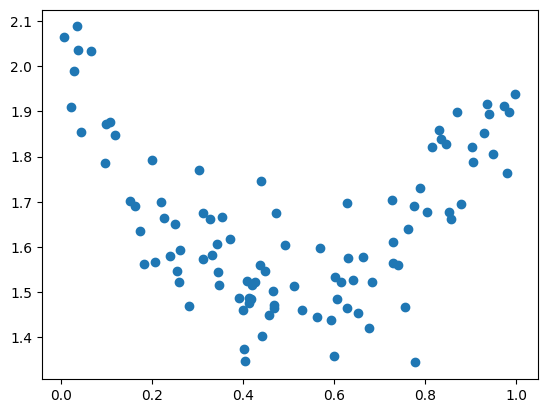

In [4]:
n = 150
sigma = 0.1

eps = st.norm.rvs(size=n, scale=sigma)
x = st.uniform.rvs(size=n)

coeffs = [2, -2, 2]
y = np.zeros(n)
for i in range(len(coeffs)):
    y += coeffs[i] * x**(len(coeffs) - i - 1)
y += eps

eps2 = st.norm.rvs(size=n, scale=sigma/(10**0.5))
x1 = x**2
x2 = x
x3 = x + eps2

X = np.stack([x1, x2, x3]).T 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True)

plt.scatter(X_train.T[1], y_train)


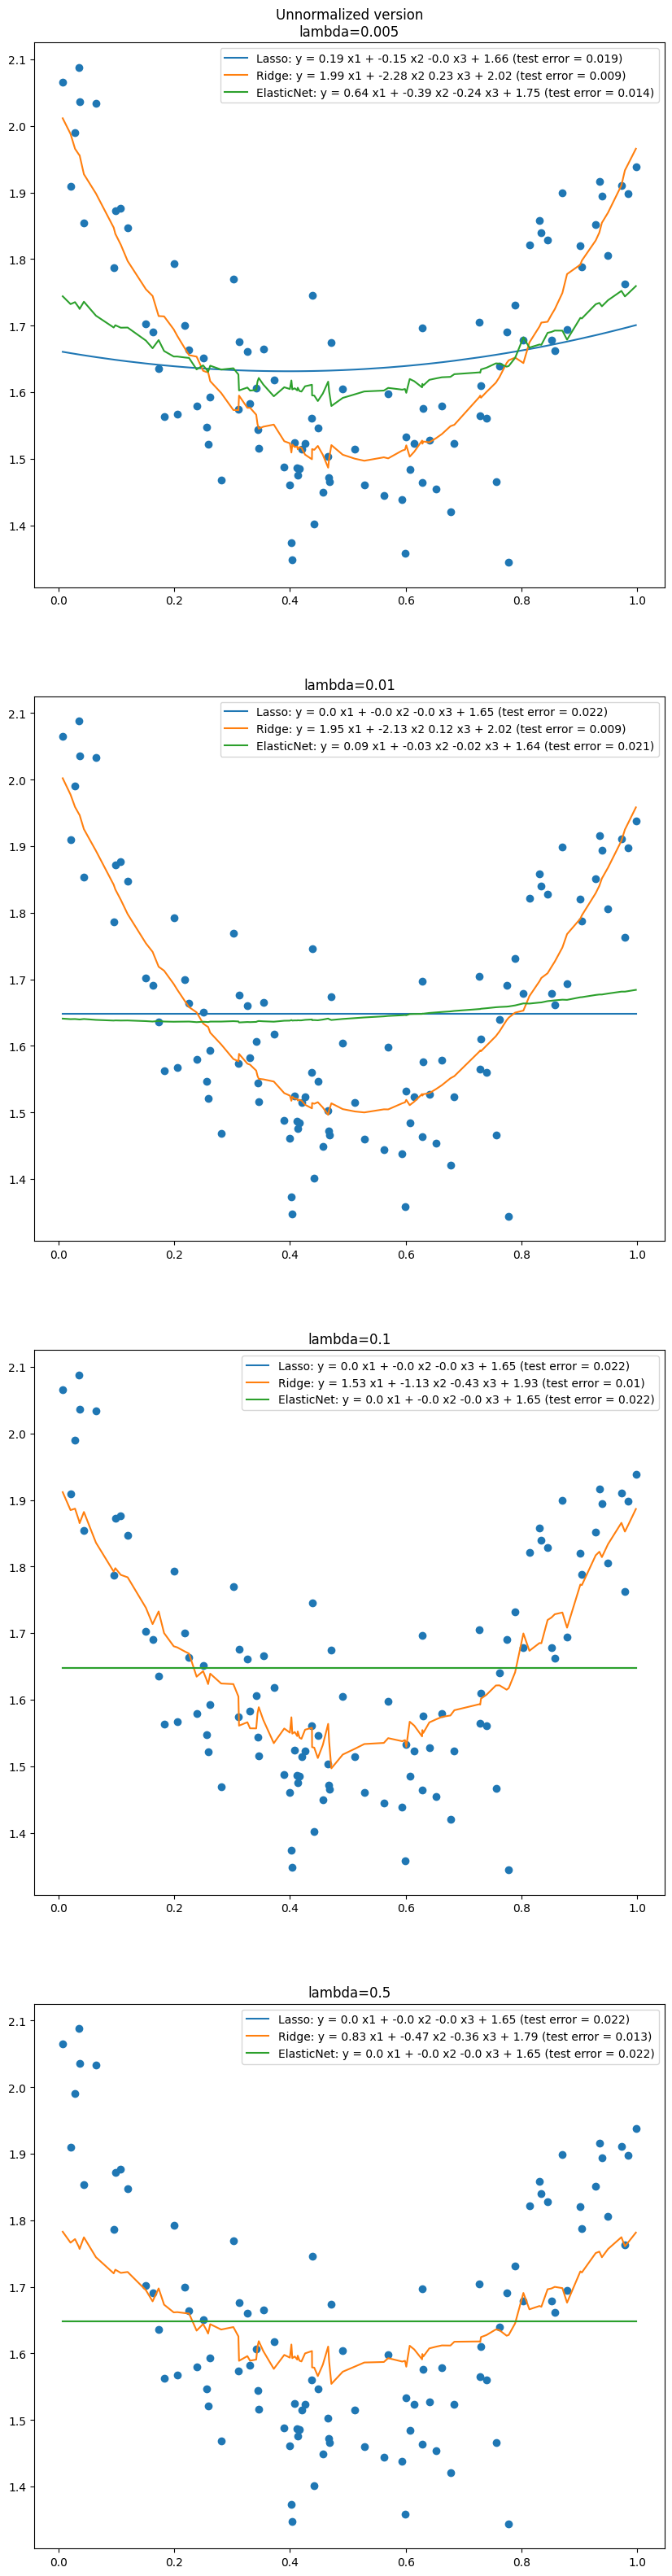

In [9]:
lambdas = [0.005, 0.01, 0.1, 0.5]

plt.figure(figsize=(10, len(lambdas) * 10))
for i in range(len(lambdas)):
    plt.subplot(len(lambdas), 1, i+1)
    if i == 0:
        plt.title(f'Unnormalized version\nlambda={lambdas[i]}')
    else:
        plt.title(f'lambda={lambdas[i]}')
    legend = []

    # Lasso
    clf = Lasso(alpha=lambdas[i])
    clf.fit(X_train, y_train)

    legend.append('Lasso: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2 ' + 
                   f'{round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(X_test) - y_test)**2), 3)})')

    xu = X_train.T[1]
    yu = clf.predict(X_train)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)

    # Ridge
    clf = Ridge(alpha=lambdas[i])
    clf.fit(X_train, y_train)

    legend.append('Ridge: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2' + 
                   f' {round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(X_test) - y_test)**2), 3)})')
    
    xu = X_train.T[1]
    yu = clf.predict(X_train)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)
    

    # ElasticNet
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    clf.fit(X_train, y_train)

    legend.append('ElasticNet: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2' + 
                   f' {round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(X_test) - y_test)**2), 3)})')
    
    xu = X_train.T[1]
    yu = clf.predict(X_train)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)
    plt.legend(legend)

    plt.scatter(X_train.T[1], y_train)

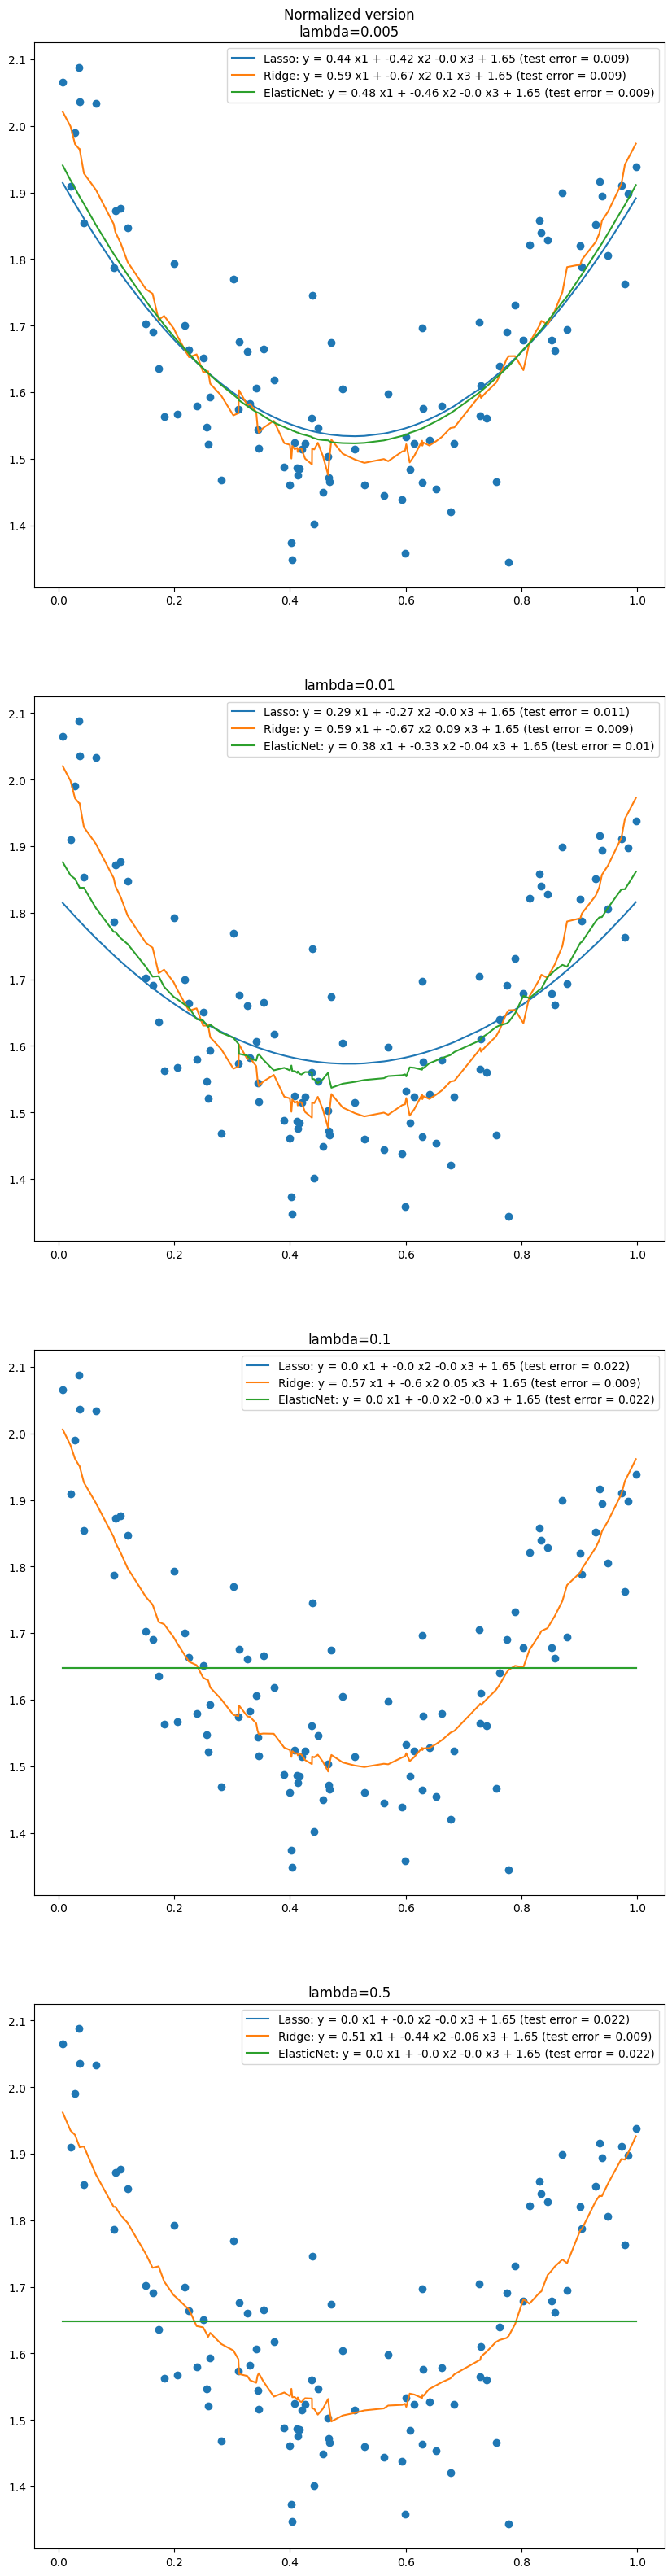

In [11]:
lambdas = [0.005, 0.01, 0.1, 0.5]

s = StandardScaler()
s.fit(X_train)
X_norm = s.transform(X_train)

plt.figure(figsize=(10, len(lambdas) * 10))
for i in range(len(lambdas)):
    plt.subplot(len(lambdas), 1, i+1)
    if i == 0:
        plt.title(f'Normalized version\nlambda={lambdas[i]}')
    else:
        plt.title(f'lambda={lambdas[i]}')
    legend = []

    # Lasso
    clf = Lasso(alpha=lambdas[i])
    clf.fit(X_norm, y_train)

    legend.append('Lasso: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2' + 
                   f' {round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(s.transform(X_test)) - y_test)**2), 3)})')
    
    xu = X_train.T[1]
    yu = clf.predict(X_norm)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)

    # Ridge
    clf = Ridge(alpha=lambdas[i])
    clf.fit(X_norm, y_train)

    legend.append('Ridge: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2' + 
                   f' {round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(s.transform(X_test)) - y_test)**2), 3)})')
    
    xu = X_train.T[1]
    yu = clf.predict(X_norm)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)
    

    # ElasticNet
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    clf.fit(X_norm, y_train)

    legend.append('ElasticNet: y = ' + f'{round(clf.coef_[0], 2)} x1 + {round(clf.coef_[1], 2)} x2' + 
                   f' {round(clf.coef_[2], 2)} x3 + {round(clf.intercept_, 2)} (test error = {round(np.mean((clf.predict(s.transform(X_test)) - y_test)**2), 3)})')
    
    xu = X_train.T[1]
    yu = clf.predict(X_norm)
    order = np.argsort(xu)
    xs = np.array(xu)[order]
    ys = np.array(yu)[order]
    plt.plot(xs, ys)
    plt.legend(legend)

    plt.scatter(X_train.T[1], y_train)

# Task 2


CRIM     per capita crime rate by town

ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS    proportion of non-retail business acres per town

CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      nitric oxides concentration (parts per 10 million)
 
RM       average number of rooms per dwelling
 
AGE      proportion of owner-occupied units built prior to 1940
 
DIS      weighted distances to five Boston employment centres
 
RAD      index of accessibility to radial highways
 
TAX      full-value property-tax rate per $10,000
 
PTRATIO  pupil-teacher ratio by town
 
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
LSTAT    % lower status of the population
 
MEDV     Median value of owner-occupied homes in $1000's

In [5]:
data_names = np.array(['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT', 
 'free coef'])
target_name = 'MEDV'

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [15]:
data.shape, X_norm.shape

((506, 13), (506, 13))

100%|██████████| 99/99 [00:00<00:00, 4096.89it/s]

['RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT' 'free coef']


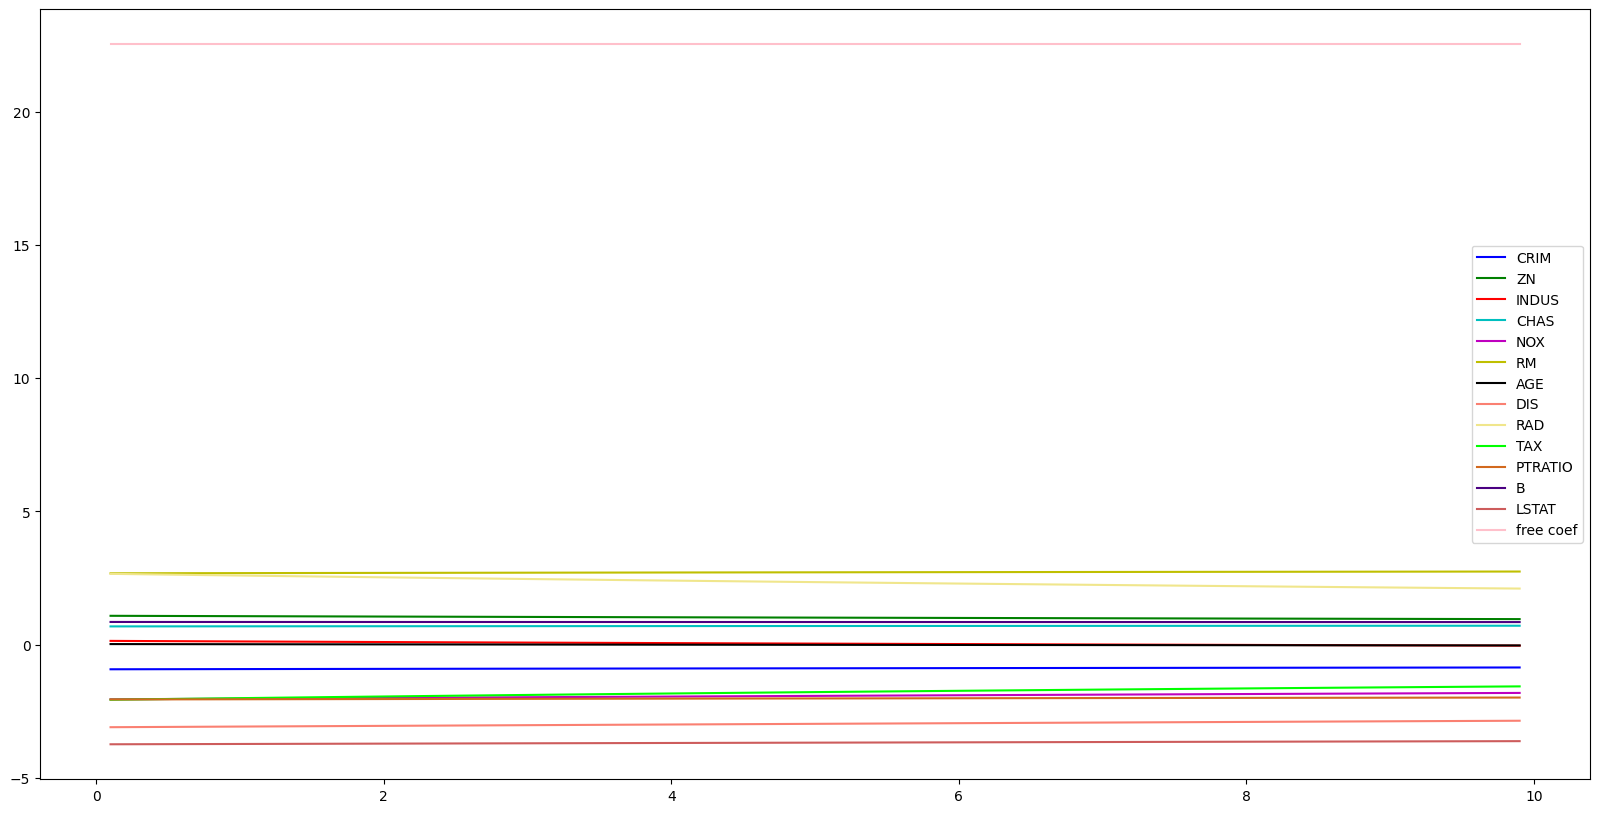

In [23]:
lambdas = np.arange(0.1, 10, 0.1)
res = []

s = StandardScaler()
s.fit(data)
X_norm = s.transform(data)

for i in tqdm(range(len(lambdas))):
    clf = Ridge(alpha=lambdas[i])
    clf.fit(X_norm, target)

    res.append(np.append(clf.coef_, clf.intercept_))

res = np.array(res)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
          'salmon', 'khaki', 'lime', 'chocolate', 
          'indigo', 'indianred', 'pink']

plt.figure(figsize=(20, 10))

for i, y in enumerate(res.T):
    plt.plot(lambdas, y, c=colors[i])

print(data_names[(np.abs(res[len(res) // 2]) >= sorted(np.abs(res[len(res) // 2]), reverse=True)[5]) & (res[len(res) // 2] != 0)])

plt.legend(data_names)

100%|██████████| 99/99 [00:00<00:00, 4167.20it/s]

['RM' 'LSTAT' 'free coef']


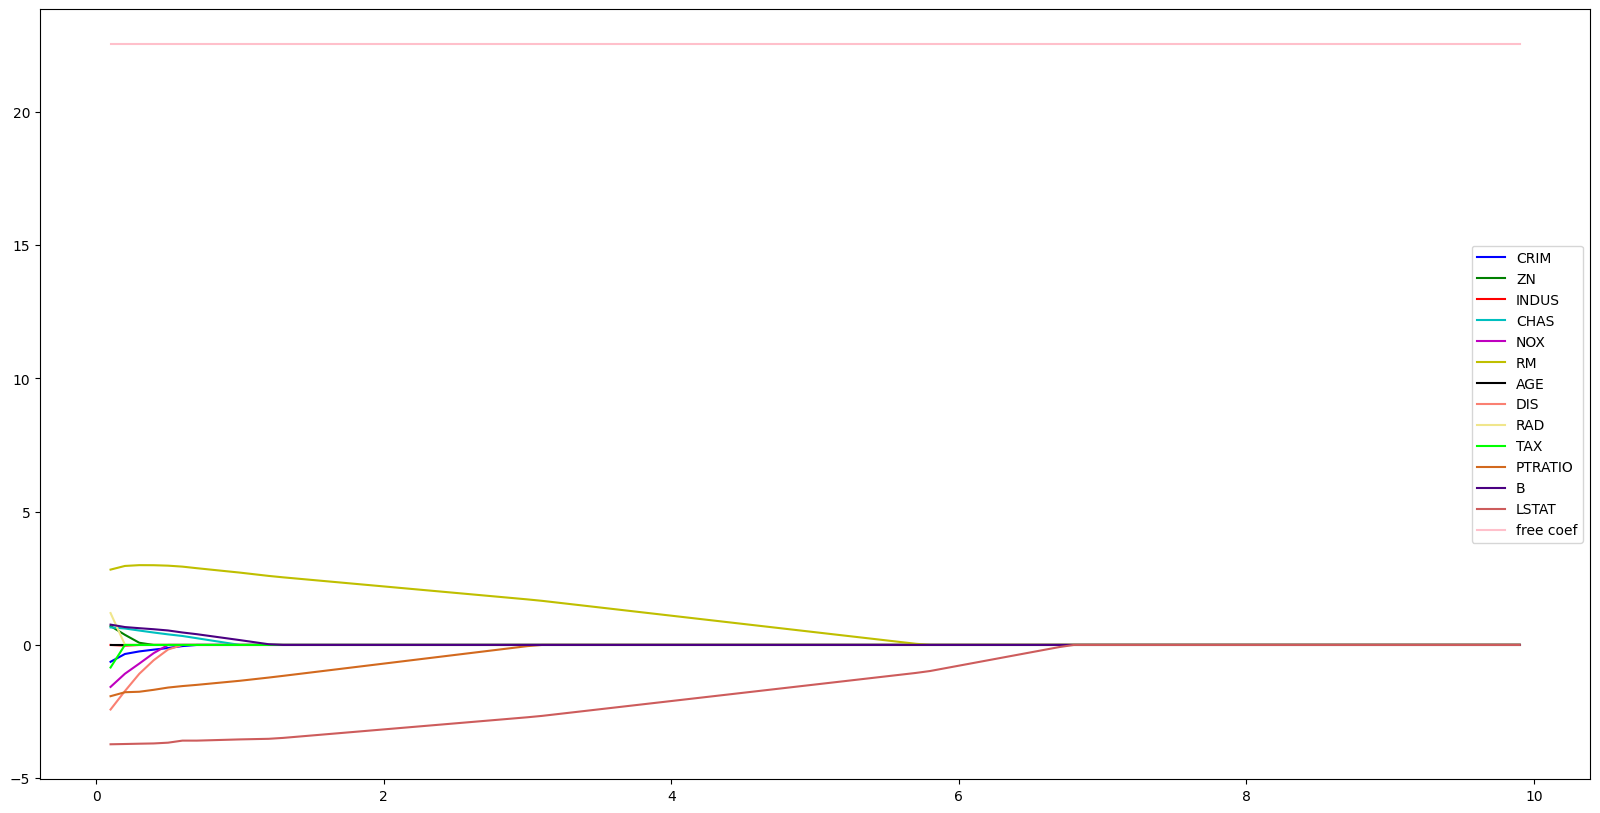

In [22]:
lambdas = np.arange(0.1, 10, 0.1)
res = []

s = StandardScaler()
s.fit(data)
X_norm = s.transform(data)

for i in tqdm(range(len(lambdas))):
    clf = Lasso(alpha=lambdas[i])
    clf.fit(X_norm, target)

    res.append(np.append(clf.coef_, clf.intercept_))

res = np.array(res)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
          'salmon', 'khaki', 'lime', 'chocolate', 
          'indigo', 'indianred', 'pink']

plt.figure(figsize=(20, 10))

for i, y in enumerate(res.T):
    plt.plot(lambdas, y, c=colors[i])

print(data_names[(np.abs(res[len(res) // 2]) >= sorted(np.abs(res[len(res) // 2]), reverse=True)[5]) & (res[len(res) // 2] != 0)])

plt.legend(data_names)

100%|██████████| 49/49 [00:00<00:00, 3053.94it/s]

['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'free coef']


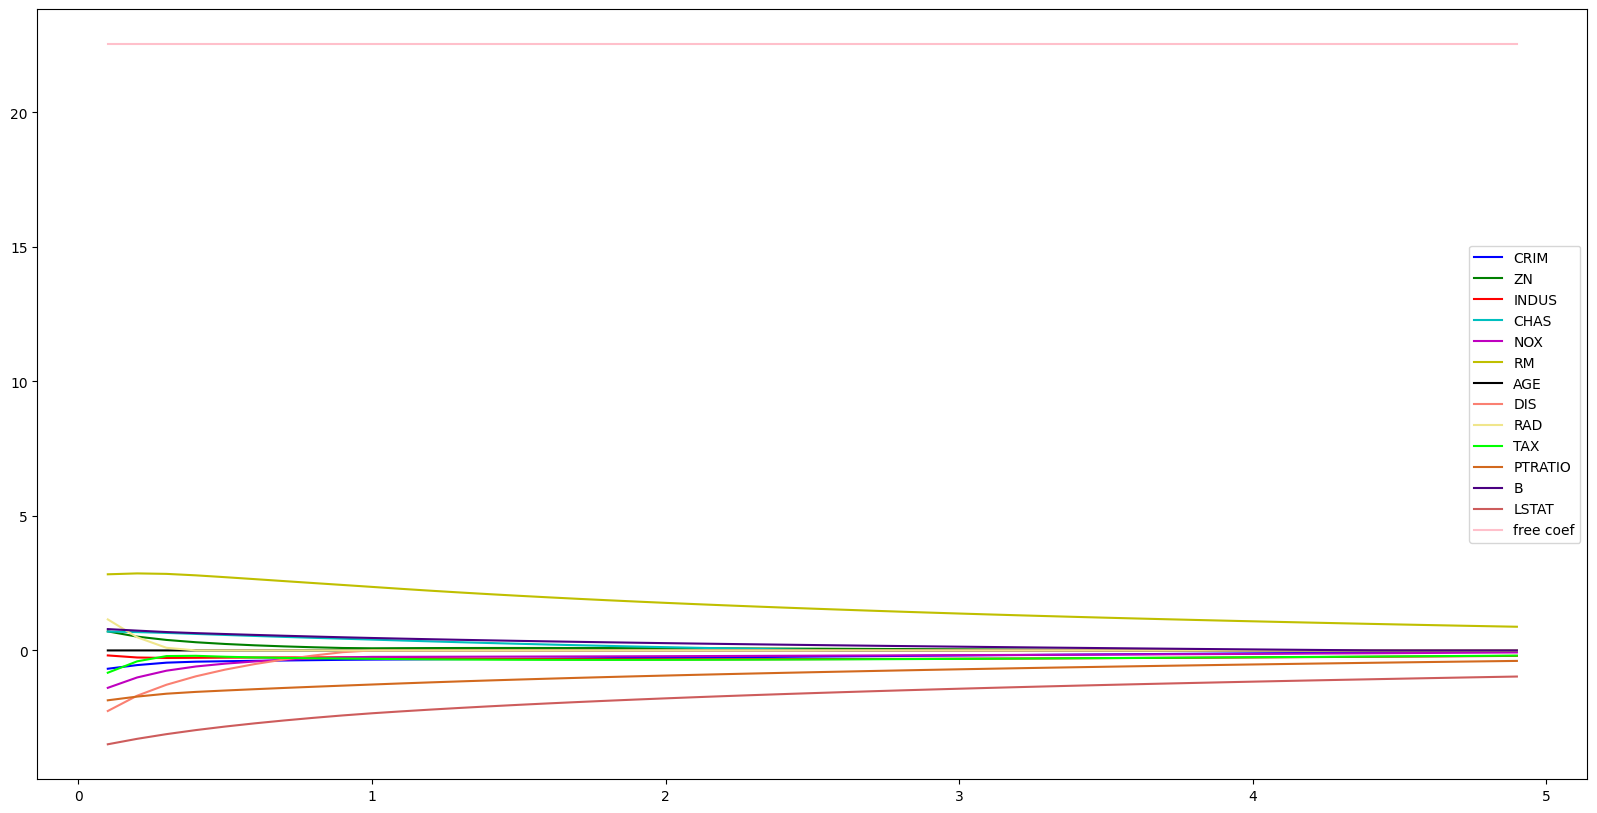

In [24]:
lambdas = np.arange(0.1, 5, 0.1)
res = []

s = StandardScaler()
s.fit(data)
X_norm = s.transform(data)

for i in tqdm(range(len(lambdas))):
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    clf.fit(X_norm, target)

    res.append(np.append(clf.coef_, clf.intercept_))

res = np.array(res)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
          'salmon', 'khaki', 'lime', 'chocolate', 
          'indigo', 'indianred', 'pink']

plt.figure(figsize=(20, 10))

for i, y in enumerate(res.T):
    plt.plot(lambdas, y, c=colors[i])

print(data_names[(np.abs(res[len(res) // 2]) >= sorted(np.abs(res[len(res) // 2]), reverse=True)[5]) & (res[len(res) // 2] != 0)])

plt.legend(data_names)

# Task 3

In [25]:
df = pd.read_csv('./datasets/fat.txt', sep=';')

In [26]:
df.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [27]:
df = df.drop(columns=['free', 'siri', 'density'])

In [28]:
df.head()

,brozek,age,weight,height,adipos,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [29]:
y = df['brozek']
X = df[df.columns[df.columns != 'brozek']]

s = StandardScaler()
s.fit(X)
X_norm = s.transform(X)

In [30]:
results = []

100%|██████████| 2000/2000 [00:01<00:00, 1746.46it/s]


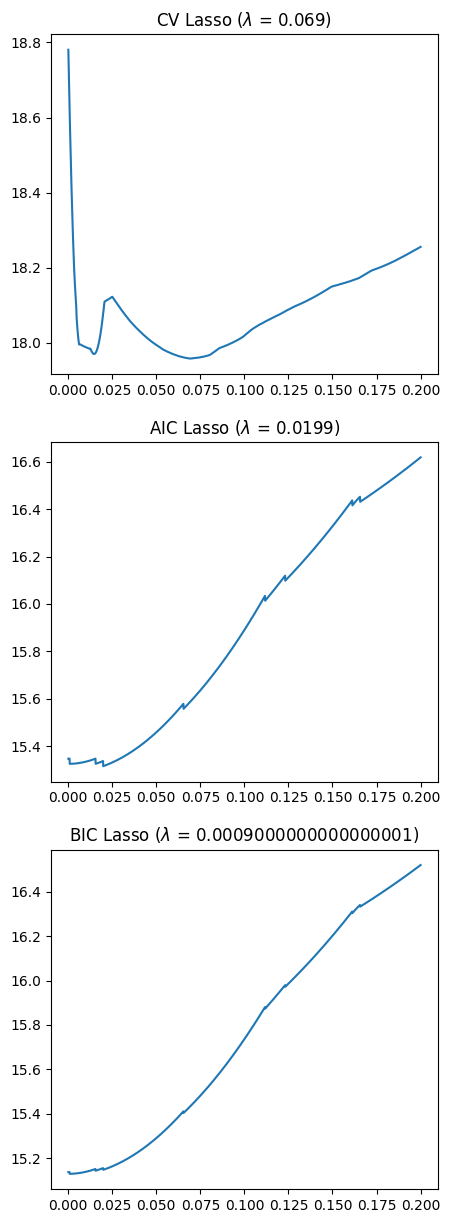

In [31]:
lambdas = np.arange(0.0001, 0.2, 0.0001)
plt.figure(figsize=(5,15))
plt.subplot(3, 1, 1)
res = []

for i in tqdm(range(len(lambdas))):
    clf = Lasso(alpha=lambdas[i])
    res.append(-np.mean(cross_val_score(clf, X_norm, y, cv=5, scoring='neg_mean_squared_error')))

plt.plot(lambdas, res)
plt.title(f'CV Lasso ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = Lasso(alpha=lambdas[np.argmin(res)])
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.subplot(3, 1, 2)

res = []

for i in tqdm(range(len(lambdas))):
    clf = Lasso(alpha=lambdas[i])
    clf.fit(X_norm, y)
    k = 1 * (clf.intercept_ != 0) + np.sum(clf.coef_ != 0)
    res.append(np.mean((clf.predict(X_norm) - y)**2) + k * np.log(len(y)) / len(y))
plt.plot(lambdas, res)
plt.title(f'AIC Lasso ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = Lasso(alpha=lambdas[np.argmin(res)])
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.subplot(3, 1, 3)

res = []

for i in tqdm(range(len(lambdas))):
    clf = Lasso(alpha=lambdas[i])
    clf.fit(X_norm, y)
    k = 1 * (clf.intercept_ != 0) + np.sum(clf.coef_ != 0)
    res.append(np.mean((clf.predict(X_norm) - y)**2) + 2 * k / len(y))
plt.plot(lambdas, res)
plt.title(f'BIC Lasso ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = Lasso(alpha=lambdas[np.argmin(res)])
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.show()

100%|██████████| 2000/2000 [00:01<00:00, 1699.41it/s]


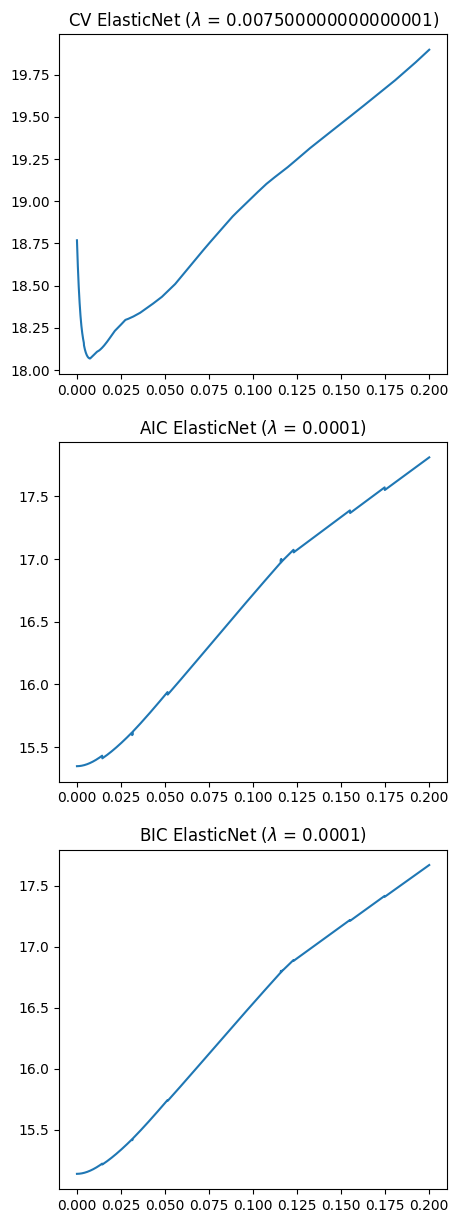

In [32]:
lambdas = np.arange(0.0001, 0.2, 0.0001)
plt.figure(figsize=(5,15))
plt.subplot(3, 1, 1)
res = []

for i in tqdm(range(len(lambdas))):
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    res.append(-np.mean(cross_val_score(clf, X_norm, y, cv=5, scoring='neg_mean_squared_error')))

plt.plot(lambdas, res)
plt.title(f'CV ElasticNet ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = ElasticNet(alpha=lambdas[np.argmin(res)], l1_ratio=0.5)
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.subplot(3, 1, 2)

res = []

for i in tqdm(range(len(lambdas))):
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    clf.fit(X_norm, y)
    k = 1 * (clf.intercept_ != 0) + np.sum(clf.coef_ != 0)
    res.append(np.mean((clf.predict(X_norm) - y)**2) + k * np.log(len(y)) / len(y))
plt.plot(lambdas, res)
plt.title(f'AIC ElasticNet ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = ElasticNet(alpha=lambdas[np.argmin(res)], l1_ratio=0.5)
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.subplot(3, 1, 3)

res = []

for i in tqdm(range(len(lambdas))):
    clf = ElasticNet(alpha=lambdas[i], l1_ratio=0.5)
    clf.fit(X_norm, y)
    k = 1 * (clf.intercept_ != 0) + np.sum(clf.coef_ != 0)
    res.append(np.mean((clf.predict(X_norm) - y)**2) + 2 * k / len(y))
plt.plot(lambdas, res)
plt.title(f'BIC ElasticNet ($\lambda$ = {lambdas[np.argmin(res)]})')

clf = ElasticNet(alpha=lambdas[np.argmin(res)], l1_ratio=0.5)
clf.fit(X_norm, y)
results.append(list(zip(X.columns[clf.coef_ != 0], clf.coef_[clf.coef_ != 0])))

plt.show()

In [33]:
results

[[('age', 0.6613530905477946),
  ('weight', -1.2063866999301798),
  ('height', -0.3887501475379572),
  ('neck', -0.869211457348578),
  ('abdom', 8.373658518114581),
  ('hip', -0.6814911703431387),
  ('thigh', 0.4835427660540532),
  ('biceps', 0.2028371177048098),
  ('forearm', 0.6922698887115772),
  ('wrist', -1.2951945084660068)],
 [('age', 0.6943454977190056),
  ('weight', -2.1377908080329746),
  ('height', -0.26809770978310604),
  ('neck', -1.0083519760375272),
  ('abdom', 9.122454166125186),
  ('hip', -1.1744376322725667),
  ('thigh', 1.0204861266219976),
  ('ankle', 0.19296453860495336),
  ('biceps', 0.38016108838158075),
  ('forearm', 0.8088259407059571),
  ('wrist', -1.3499564955262142)],
 [('age', 0.7139584269891074),
  ('weight', -2.374774267623769),
  ('height', -0.19781481413708682),
  ('adipos', 0.21038970183465114),
  ('neck', -1.0757408575821399),
  ('chest', -0.2471456028164968),
  ('abdom', 9.444826127947326),
  ('hip', -1.4394203251969049),
  ('thigh', 1.18287093329132